<a href="https://colab.research.google.com/github/carloscesar182/ai_advanced_course/blob/main/Notebooks/AnomalyDetection/LSTMAnomalias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# importar os dados de treino
dataset_train = pd.read_csv('Salestrain.csv')

In [ ]:
# shape para visualizar o formato
dataset_train.shape

(96, 1)

In [ ]:
# ver os dados
dataset_train

,data
0,112
1,118
2,132
3,129
4,121
...,...
91,405
92,355
93,306
94,271


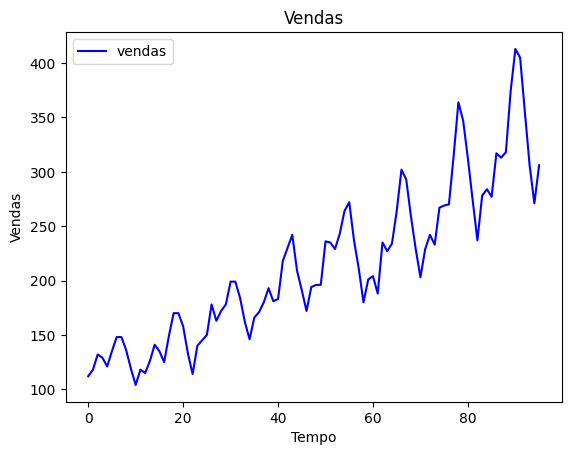

In [7]:
# visualizar o gráfico desses dados
plt.plot(dataset_train, color = 'blue', label = 'vendas')
plt.title('Vendas')
plt.xlabel('Tempo')
plt.ylabel('Vendas')
plt.legend()
plt.show()

In [8]:
# normalizar os dados
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(dataset_train)

In [9]:
# transformar os dados construindo uma matriz de janela deslizante
X_train = []
y_train = []
for i in range(90, len(training_set_scaled)):
  data = training_set_scaled[i-90:i, 0]
  X_train.append(data)
  y_train.append(training_set_scaled[i, 0])

# converter pra array e aplicar reshape
X_train = np.array(X_train).reshape(-1, 90, 1)
y_train = np.array(y_train)

In [11]:
from keras.layers import Input

# construir o modelo da rede neural
modelo = Sequential()

# units é o num de neuronios, return_seq por padrão é falso e a gente muda pra true pra informar que é uma sequencia de dados
modelo.add(Input(shape=(X_train.shape[1], 1)))
modelo.add(LSTM(units = 100, return_sequences = True))
modelo.add(Dropout(0.2)) # exclui neuronios de forma aleatória pra evitar overfitting

# empilhar mais camadas
modelo.add(LSTM(units = 100, return_sequences = True))
modelo.add(Dropout(0.2))
modelo.add(LSTM(units = 100, return_sequences = True))
modelo.add(Dropout(0.2))
modelo.add(LSTM(units = 100))
modelo.add(Dropout(0.2))

# camada de saída
modelo.add(Dense(units = 1))

In [12]:
# compilar o modelo
modelo.compile(optimizer = 'adam', loss = 'mean_squared_error')
modelo.fit(X_train, y_train, epochs = 300, batch_size = 1)

Epoch 1/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 0.3342
Epoch 2/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.0341
Epoch 3/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.0620
Epoch 4/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.1039
Epoch 5/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.1078
Epoch 6/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.0597
Epoch 7/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 0.0561
Epoch 8/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 0.0343
Epoch 9/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 0.0205
Epoch 10/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0760
Epoch 11/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.0991
Epoch 12/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - loss: 0.0429
Epoch 13/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - loss: 0.0384
Epoch 14/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0318
Epoch 15/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0473
Epoch 16/3

In [13]:
# importar os dados de teste
dataset_test = pd.read_csv('Salestest.csv')
dataset_test.shape

(48, 1)

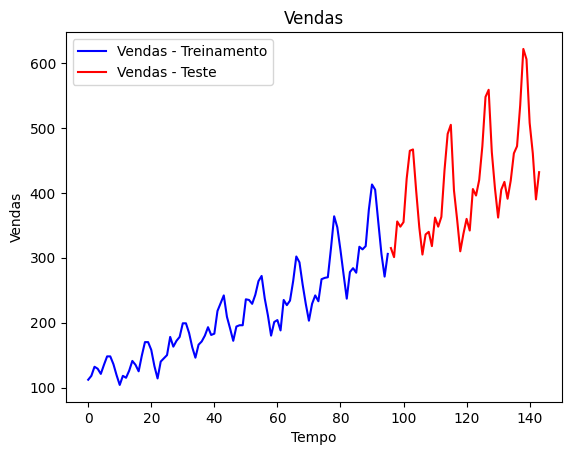

In [14]:
# gerar um grafico dos 2 datasets juntos
train_values = dataset_train['data'].values
test_values = dataset_test['data'].values
total_values = np.concatenate((train_values, test_values), axis = 0)

# indece pro matplolib colocar em sequencia
time_index = range(len(total_values))

# impressão
plt.plot(time_index[:len(train_values)], train_values, color = 'blue', label = 'Vendas - Treinamento')
plt.plot(time_index[len(train_values):], test_values, color = 'red', label = 'Vendas - Teste')
plt.title('Vendas')
plt.xlabel('Tempo')
plt.ylabel('Vendas')
plt.legend()
plt.show()

In [18]:
# criar datasets e adicionar anomalias
# copiar dados de testes
dataset_test_anomalies = dataset_test.copy()

# adicionar anomalias com range
dataset_test_anomalies.loc[:9,'data'] = 90.0
dataset_test_anomalies.loc[10:34,'data'] = np.random.uniform(100,200, size=(25,)).astype(np.float64)
dataset_test_anomalies.loc[35:,'data'] = 90.0

/tmp/ipython-input-2391226482.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[187.13007151 169.17500421 192.03379924 185.57224771 199.05217423
 106.90791273 156.97398375 129.57162633 183.20552578 198.55289963
 104.17823389 165.74378111 138.8067691  198.73066523 193.84321116
 178.54959028 125.47641745 138.64275534 144.46693989 155.66494267
 136.58591783 102.59142758 112.7230803  183.81207654 183.08428119]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset_test_anomalies.loc[10:34,'data'] = np.random.uniform(100,200, size=(25,)).astype(np.float64)


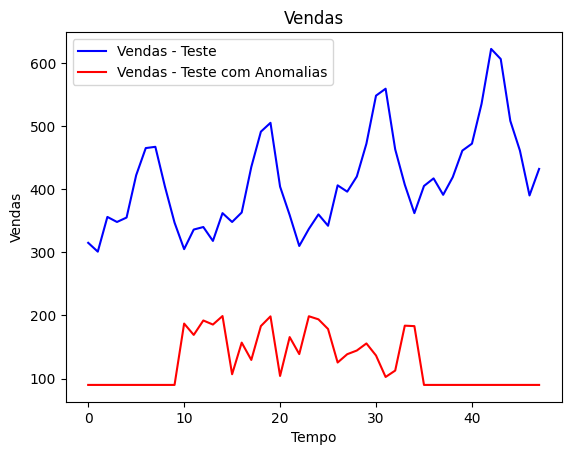

In [19]:
# gerar um grafico e comparar os datasets
plt.plot(dataset_test, color = 'blue', label = 'Vendas - Teste')
plt.plot(dataset_test_anomalies, color = 'red', label = 'Vendas - Teste com Anomalias')
plt.title('Vendas')
plt.xlabel('Tempo')
plt.ylabel('Vendas')
plt.legend()
plt.show()

In [21]:
# concatenar os dados de treino e teste
dataset_total = pd.concat((dataset_train['data'], dataset_test['data']), axis = 0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-90:]
inputs = pd.DataFrame(inputs, columns = ['data'])

# transformar os dados concatenados
inputs = sc.transform(inputs)

In [27]:
# fazer a mesma coisa com os dados de anomalia
dataset_total_anomalies = pd.concat((dataset_train['data'], dataset_test_anomalies['data']), axis = 0)
inputs_anomalies = dataset_total_anomalies[len(dataset_total_anomalies)-len(dataset_test_anomalies)-90:]
inputs_anomalies = pd.DataFrame(inputs_anomalies, columns = ['data'])
inputs_anomalies = sc.transform(inputs_anomalies)

In [28]:
# criar a janela deslizante com 90 observações
X_test = []
X_test_anomalies = []
for i in range(90, len(inputs)):
  X_test.append(inputs[i-90:i, 0])
  X_test_anomalies.append(inputs_anomalies[i-90:i, 0])

# converter pra um array do numpy
X_test, X_test_anomalies = np.array(X_test), np.array(X_test_anomalies)

# reshape pra deixar no formato com 3 dimensões que o modelo espera
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test_anomalies = np.reshape(X_test_anomalies, (X_test_anomalies.shape[0], X_test_anomalies.shape[1], 1))

In [29]:
# fazer a previsão
predicted_sales = modelo.predict(X_test)
predicted_sales_anomalies = modelo.predict(X_test_anomalies)

# desnormalizar os valores
predicted_sales = sc.inverse_transform(predicted_sales)
predicted_sales_anomalies = sc.inverse_transform(predicted_sales_anomalies)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [30]:
# calcular o erro dos 2
mse_test = mean_squared_error(test_values, predicted_sales)
mse_test_anomalies = mean_squared_error(test_values, predicted_sales_anomalies)

# imprimir as metricas
print('MSE - Teste: ', mse_test)
print('MSE - Teste com Anomalias: ', mse_test_anomalies)

MSE - Teste:  8130.92529296875
MSE - Teste com Anomalias:  15183.8212890625


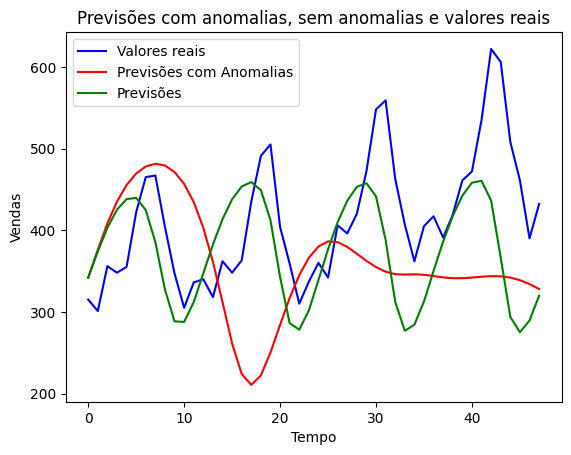

In [31]:
# gerar um grafico comparando valores reais, previsão com anomalias e previsão
plt.plot(test_values, color = 'blue', label = 'Valores reais')
plt.plot(predicted_sales_anomalies, color = 'red', label = 'Previsões com Anomalias')
plt.plot(predicted_sales, color = 'green', label = 'Previsões')
plt.title('Previsões com anomalias, sem anomalias e valores reais')
plt.xlabel('Tempo')
plt.ylabel('Vendas')
plt.legend()
plt.show()